In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

pd.options.mode.chained_assignment = None 

In [59]:
#import our CSV file
df = pd.read_csv('2019.csv')

#drop unneccessary columns
df.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt', 
         'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb', 
         'GS', 'Age', 'Tgt', 'Y/A', 'Att', 'Att.1', 'Cmp', 'Y/R'], axis=1, inplace=True)

#fix name formatting
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

#rename columns
df.rename({
    'TD': 'PassingTD',
    'TD.1': 'RushingTD',
    'TD.2': 'ReceivingTD',
    'TD.3': 'TotalTD',
    'Yds': 'PassingYDs',
    'Yds.1': 'RushingYDs',
    'Yds.2': 'ReceivingYDs',
}, axis=1, inplace=True)

"""Extra stuff before we parition DataFrames by position"""

#Make sure to put paranthesis if you break lines.
df['FantasyPoints'] = (df['PassingYDs']*0.04 +df['Rec'] + df['PassingTD']*4 - df['Int']*2 + df['RushingYDs']*.1 
                       + df['RushingTD']*6 + df['ReceivingYDs']*.1 + df['ReceivingTD']*6 - df['FL']*2)

df['FantasyPoints/GM'] = df['FantasyPoints']/df['G']

#Unfortnately, our DataFrame in limited. 
df = df[df['Tm'] != '2TM']
df = df[df['Tm'] != '3TM']

rb_df = df[df['FantPos'] == 'RB']
rb_df['Rec/G'] = rb_df['Rec']/rb_df['G']
rb_df = rb_df[rb_df['Rec/G'] > 5]

df = df[['Tm', 'FantPos', 'FantasyPoints', 'FantasyPoints/GM']]
rb_df = df[['Tm', 'FantPos', 'FantasyPoints', 'FantasyPoints/GM']]

rb_df = rb_df[rb_df['Tm'] != '2TM']
rb_df = rb_df[rb_df['Tm'] != '3TM']

""" End Extra stuff """

#seperate dataframes based off position
qb_df = df[df['FantPos'] == 'QB']
wr_df = df[df['FantPos'] == 'WR']
te_df = df[df['FantPos'] == 'TE']

rb_df.head()

,Tm,FantPos,FantasyPoints,FantasyPoints/GM
0,CAR,RB,469.20,29.32500
1,BAL,QB,415.68,27.71200
2,TEN,RB,294.60,19.64000
3,GNB,RB,314.80,19.67500
4,DAL,RB,311.70,19.48125


In [60]:
examp_column_names = ['QB1', 'RB1', 'RB2', 'WR1', 'WR2', 'WR3', 'TE']

random_numbers = np.random.randn(10, 7)

example_df = pd.DataFrame(random_numbers, columns=examp_column_names)

example_df

,QB1,RB1,RB2,WR1,WR2,WR3,TE
0,0.662427,-0.942848,0.193401,-0.321642,1.908750,-0.788397,-0.151962
1,-1.955497,0.422255,0.884451,0.574035,-2.049843,-1.426291,2.224263
2,-0.123029,0.143862,3.163930,0.148401,0.894236,1.249023,0.238273
3,0.761624,-0.646450,-1.418682,0.044796,1.044976,0.704022,-2.492340
4,0.064568,-0.275181,-1.917817,-0.538464,-1.120904,0.387909,-1.053393
5,0.245629,-0.369765,-0.292815,-1.286994,1.492433,1.740076,-1.198034
6,-0.029742,0.165455,-0.321102,-0.343957,-0.793967,0.980073,0.612537
7,0.172555,0.332189,-0.525807,0.722858,2.903896,-0.492734,-0.788610
8,0.546073,0.149860,-0.239813,1.768029,1.080489,1.276057,-1.095745
9,0.525823,-1.278865,0.715868,0.147350,0.292447,1.028476,1.553367


In [61]:
def get_top_players(df, n):
    return df.groupby('Tm').apply(lambda x: x.nlargest(n, ['FantasyPoints']).min()).reset_index(drop=True)

qb_df = get_top_players(qb_df, 1)
te_df = get_top_players(te_df, 1)
rb1_df = get_top_players(rb_df, 1)
rb2_df = get_top_players(rb_df, 2)
wr1_df = get_top_players(wr_df, 1)
wr2_df = get_top_players(wr_df, 2)
wr3_df = get_top_players(wr_df, 3)

new_names = {
    'QB1': qb_df,
    'TE1': te_df,
    'RB1': rb1_df,
    'RB2': rb2_df,
    'WR1': wr1_df,
    'WR2': wr2_df,
    'WR3': wr3_df
}

for name, new_df in new_names.items():
    new_df.rename({'FantasyPoints/GM': name}, axis=1, inplace=True)
    new_df.drop(['FantPos', 'FantasyPoints'], axis=1, inplace=True)
    new_df.set_index('Tm', inplace=True)
    
df = pd.concat([qb_df, te_df, rb1_df, rb2_df, wr1_df, wr2_df, wr3_df], axis=1)

df.head()

,QB1,TE1,RB1,RB2,WR1,WR2,WR3
Tm,,,,,,,
ARI,17.455000,3.180000,17.455000,11.087500,11.087500,11.087500,6.536364
ATL,17.689333,14.592308,18.273333,17.689333,18.273333,15.000000,6.175000
BAL,27.712000,13.813333,27.712000,15.900000,10.457143,5.943750,3.756250
BUF,17.660000,5.313333,17.660000,14.654667,14.654667,12.053333,4.220000
CAR,13.652308,8.835714,29.325000,15.366667,15.366667,10.731250,3.556250


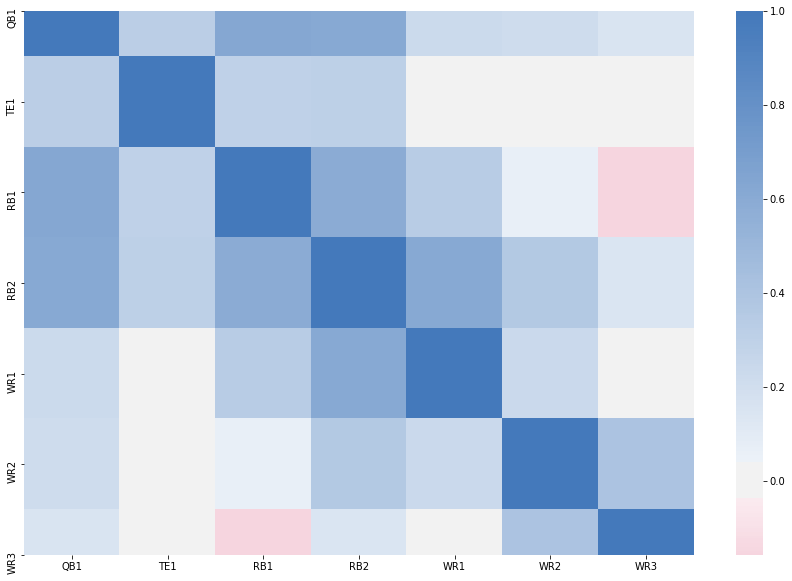

In [62]:
corrMatrix = df.corr()

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

cmap = sns.diverging_palette(0, 250, as_cmap=True)

vizCorrMatrix = sns.heatmap(corrMatrix,cmap=cmap, center=0)

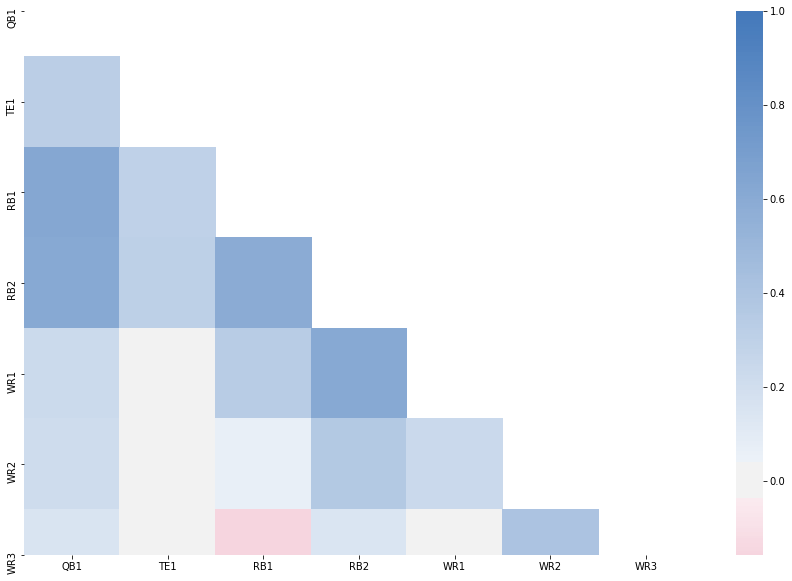

In [63]:
#This is for the Part 3 of Python for Fantasy Football Analysis

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

mask = np.zeros_like(corrMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

vizCorrMatrix = sns.heatmap(corrMatrix, mask=mask,cmap=cmap, center=0)